In [7]:
# install.packages("Matrix")
# install.packages("pracma")

library(igraph)
library('Matrix')
library('pracma')

In [8]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    distance_t = numeric()
    
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF) 
        shortest_distance=shortest.paths(g, start_node,v)
        distance_t = c(distance_t, shortest_distance)
        
    }
    degree_end_node=degree(g,v,mode="total")
    #print(degree_end_node)
    return (list(distance_t,degree_end_node))
}

In [34]:
#Part 1a
g <- erdos.renyi.game(1000, 0.01, directed=F)
is.connected(g)
vcount(g)
ecount(g)

[1] TRUE

[1] 1000

[1] 4980

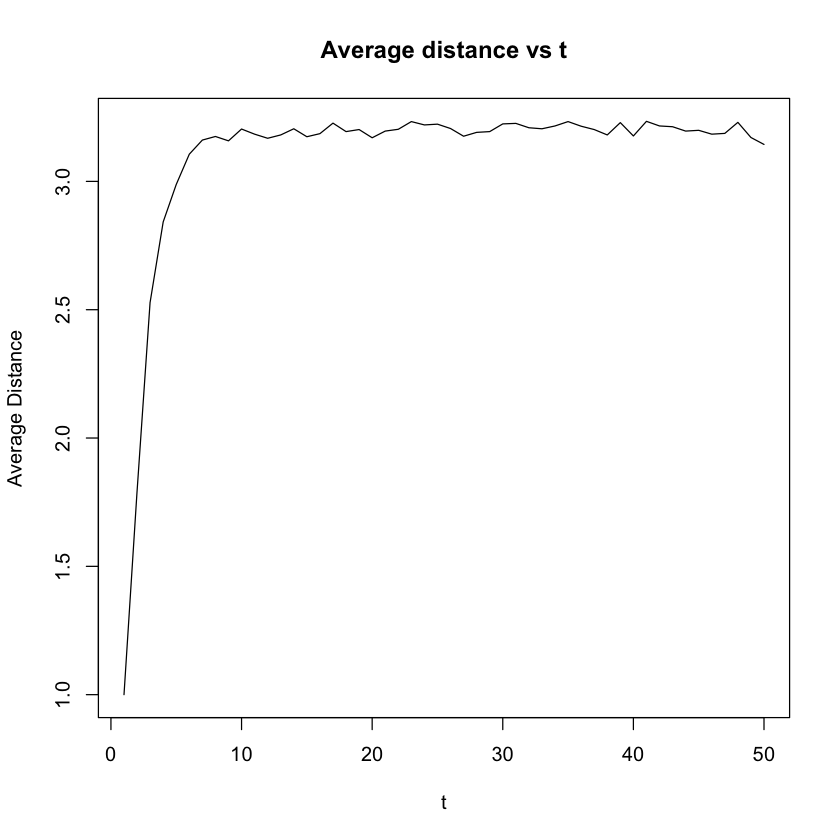

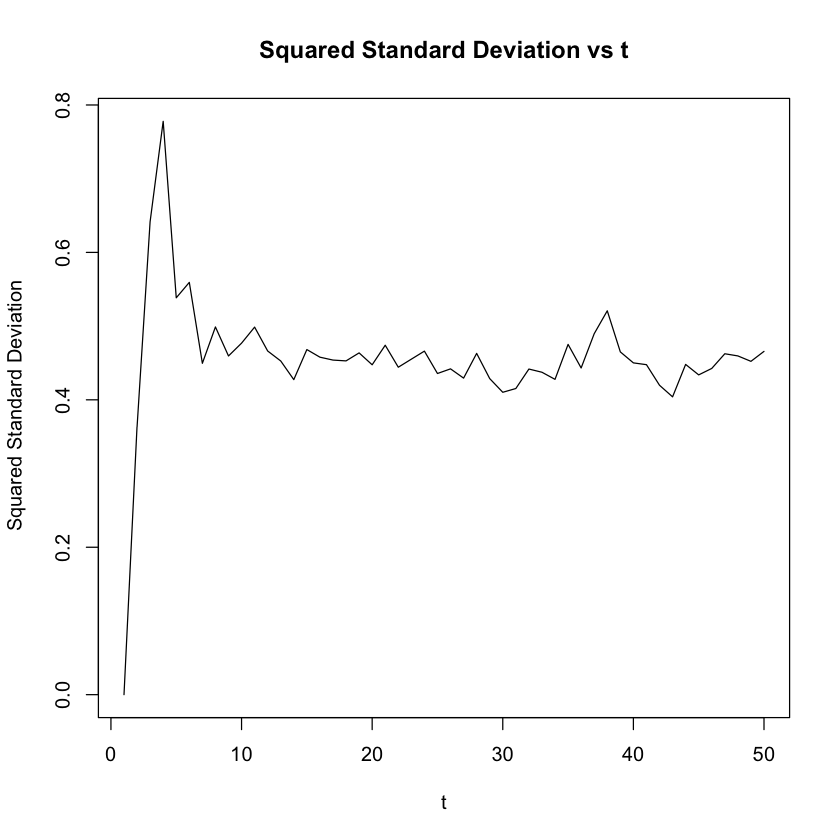

In [35]:
degree_end_node=numeric()
x <- sample(1:1000, 1000, replace=T)
tm<-create_transition_matrix(g)
average_distance_t = numeric()
standard_deviation_t = numeric() 
t<-50
mat <- matrix(, nrow = 1000, ncol = t)
row=1
for(start in x)
{
    temp<-random_walk(g,t,start,tm)
#     print(temp)
#     print(typeof(temp))
#     print(temp[1])
#     print(typeof(temp[1]))
    
    mat[row, ] <- temp[[1]]
    degree_end_node<- c(degree_end_node, temp[[2]])
    row<-row+1
#     print(mat)
}
#install.packages("matrixStats")
library(matrixStats)

average_distance_t<-colMeans(mat)
standard_deviation_t<-colSds(mat)^2

plot(average_distance_t, typ='l', main = paste("Average distance vs t"), xlab = "t", ylab = "Average Distance")
plot(standard_deviation_t, typ='l', main = paste("Squared Standard Deviation vs t"), xlab = "t", ylab = " Squared Standard Deviation")




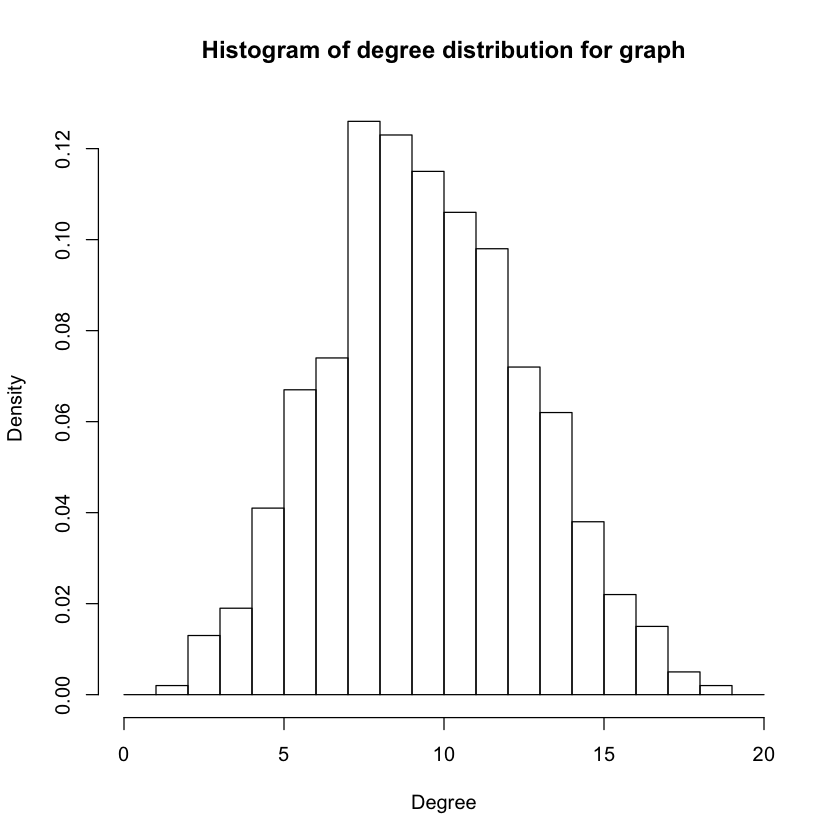

Diam: 5


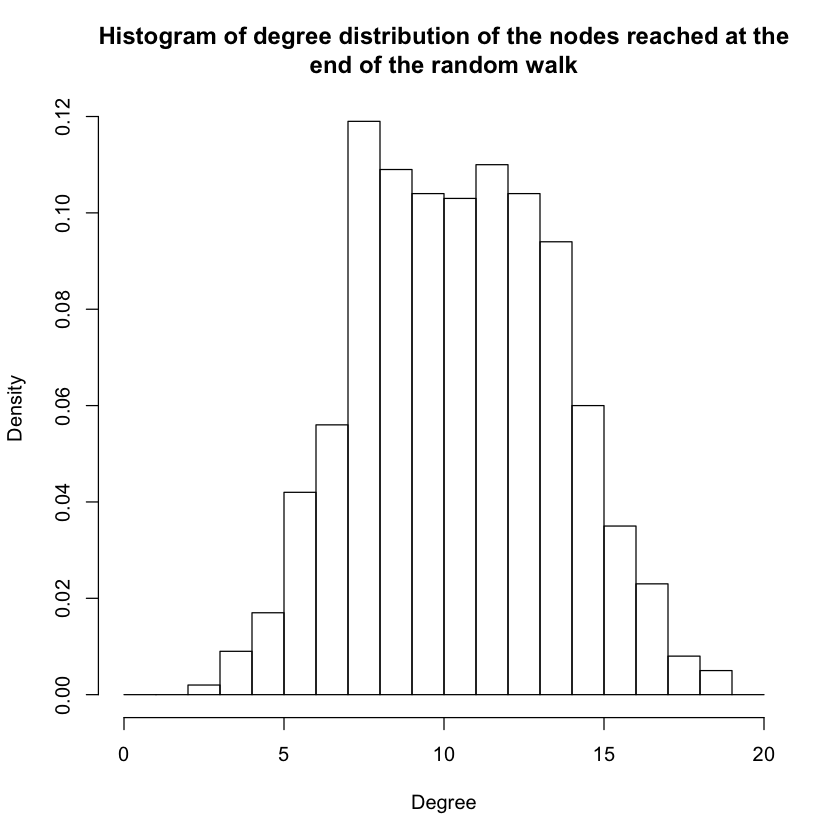

In [36]:
#Part1c
deg = degree(g)
diam = diameter(g)
hist(deg, breaks = seq(from = 0, to = max(deg) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution for graph",xlab = "Degree")
hist(degree_end_node, breaks = seq(from = 0, to = max(degree_end_node) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution of the nodes reached at the
end of the random walk",xlab = "Degree")
fprintf('Diam: %d\n', diam) 




[1] TRUE

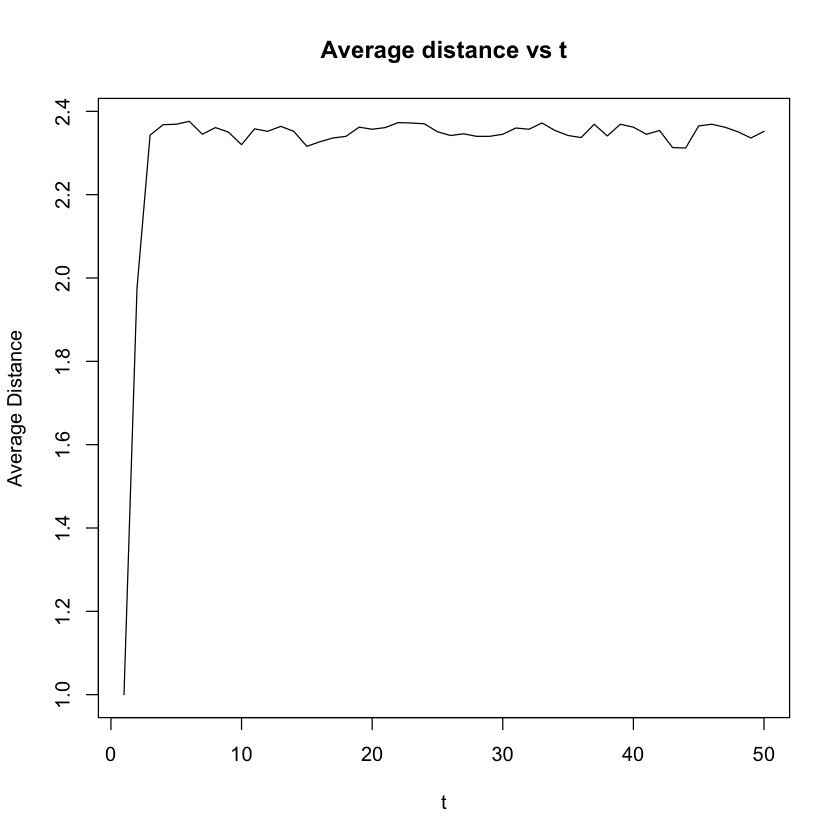

Diam: 3


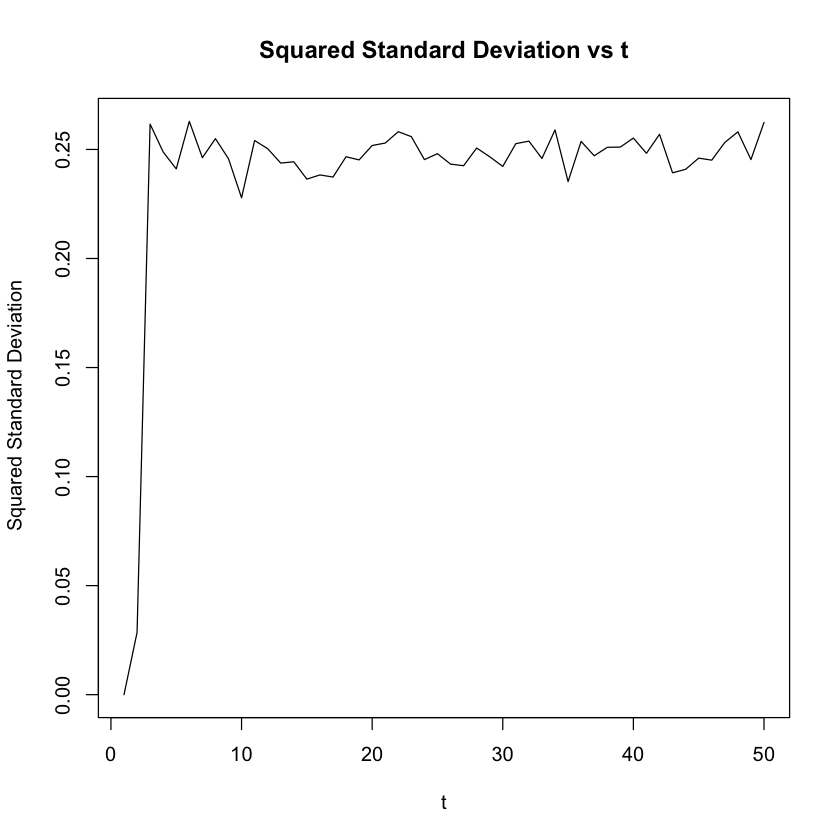

In [37]:
#Part1d

#10000 nodes
g <- erdos.renyi.game(10000, 0.01, directed=F)
is.connected(g)
#Part1b
degree_end_node=numeric()
x <- sample(1:10000, 1000, replace=T)
tm<-create_transition_matrix(g)
average_distance_t = numeric()
standard_deviation_t = numeric() 
t<-50
mat <- matrix(, nrow = 1000, ncol = t)
row=1
for(start in x)
{
    temp<-random_walk(g,t,start,tm)
#     print(temp)
#     print(typeof(temp))
#     print(temp[1])
#     print(typeof(temp[1]))
    
    mat[row, ] <- temp[[1]]
    degree_end_node<- c(degree_end_node, temp[[2]])
    row<-row+1
#     print(mat)
}
#install.packages("matrixStats")
library(matrixStats)

average_distance_t<-colMeans(mat)
standard_deviation_t<-colSds(mat)^2

plot(average_distance_t, typ='l', main = paste("Average distance vs t"), xlab = "t", ylab = "Average Distance")
plot(standard_deviation_t, typ='l', main = paste("Squared Standard Deviation vs t"), xlab = "t", ylab = " Squared Standard Deviation")

deg = degree(g)
diam = diameter(g)
# hist(deg, breaks = seq(from = 0, to = max(deg) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution for graph",xlab = "Degree")
# hist(degree_end_node, breaks = seq(from = 0, to = max(degree_end_node) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution of the nodes reached at the
# end of the random walk",xlab = "Degree")
fprintf('Diam: %d\n', diam) 





[1] FALSE

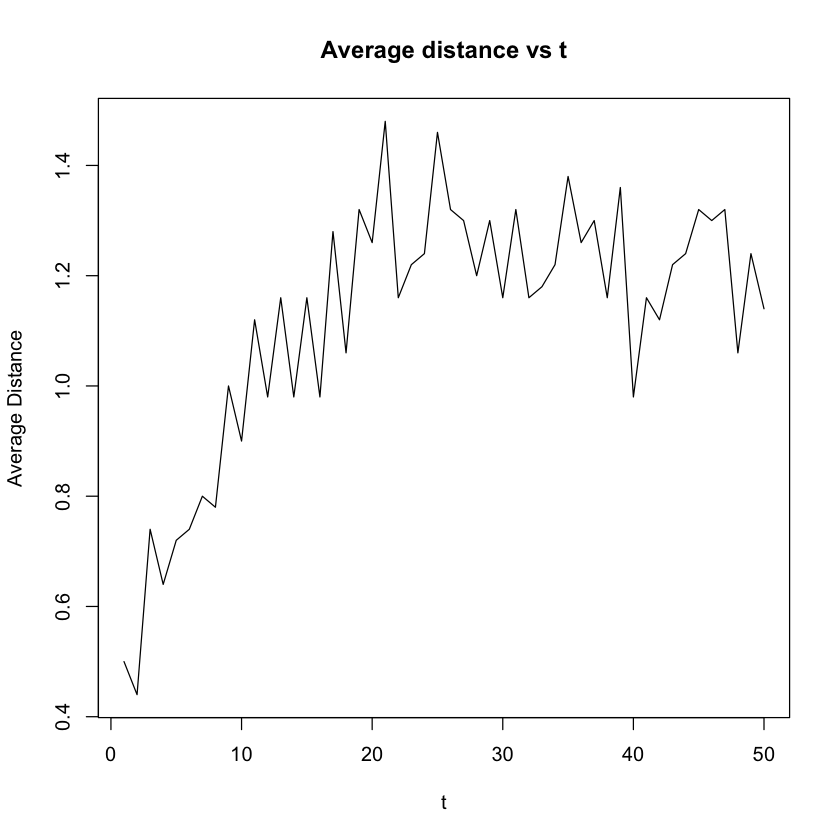

Diam: 9


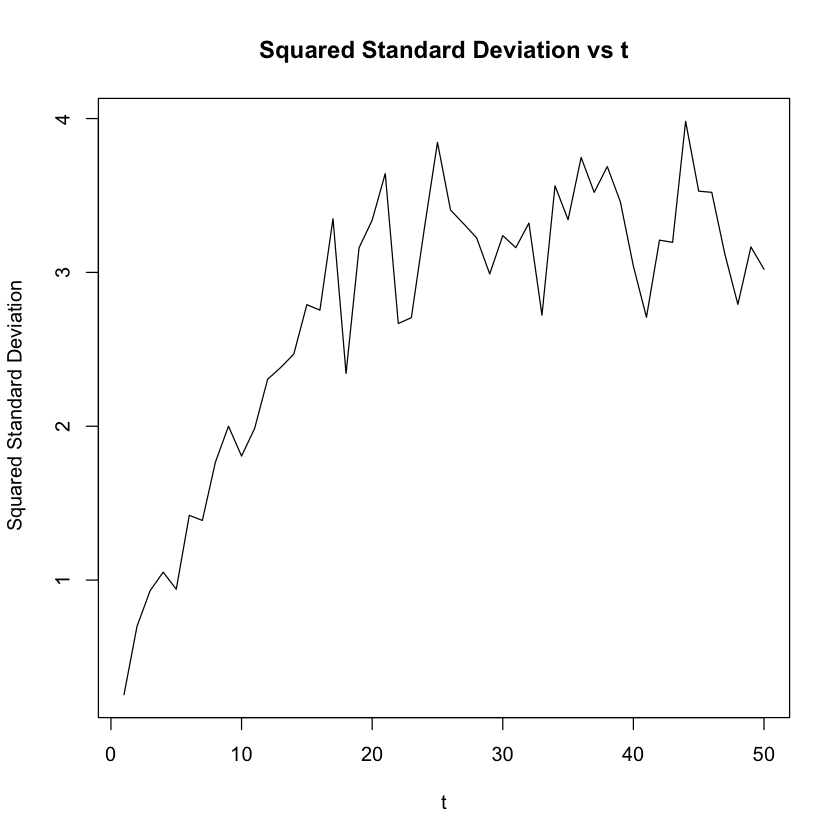

In [40]:
#Part1d

#100 nodes
g <- erdos.renyi.game(100, 0.01, directed=F)
is.connected(g)
#Part1b
degree_end_node=numeric()
x <- sample(1:100, 50, replace=T)
tm<-create_transition_matrix(g)
average_distance_t = numeric()
standard_deviation_t = numeric() 
t<-50
mat <- matrix(, nrow = 50, ncol = t)
row=1
for(start in x)
{
    temp<-random_walk(g,t,start,tm)
#     print(temp)
#     print(typeof(temp))
#     print(temp[1])
#     print(typeof(temp[1]))
    
    mat[row, ] <- temp[[1]]
    degree_end_node<- c(degree_end_node, temp[[2]])
    row<-row+1
#     print(mat)
}
#install.packages("matrixStats")
library(matrixStats)

average_distance_t<-colMeans(mat)
standard_deviation_t<-colSds(mat)^2

plot(average_distance_t, typ='l', main = paste("Average distance vs t"), xlab = "t", ylab = "Average Distance")
plot(standard_deviation_t, typ='l', main = paste("Squared Standard Deviation vs t"), xlab = "t", ylab = " Squared Standard Deviation")

deg = degree(g)
diam = diameter(g)
# hist(deg, breaks = seq(from = 0, to = max(deg) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution for graph",xlab = "Degree")
# hist(degree_end_node, breaks = seq(from = 0, to = max(degree_end_node) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution of the nodes reached at the
# end of the random walk",xlab = "Degree")
fprintf('Diam: %d\n', diam) 






[1] FALSE

[1] TRUE

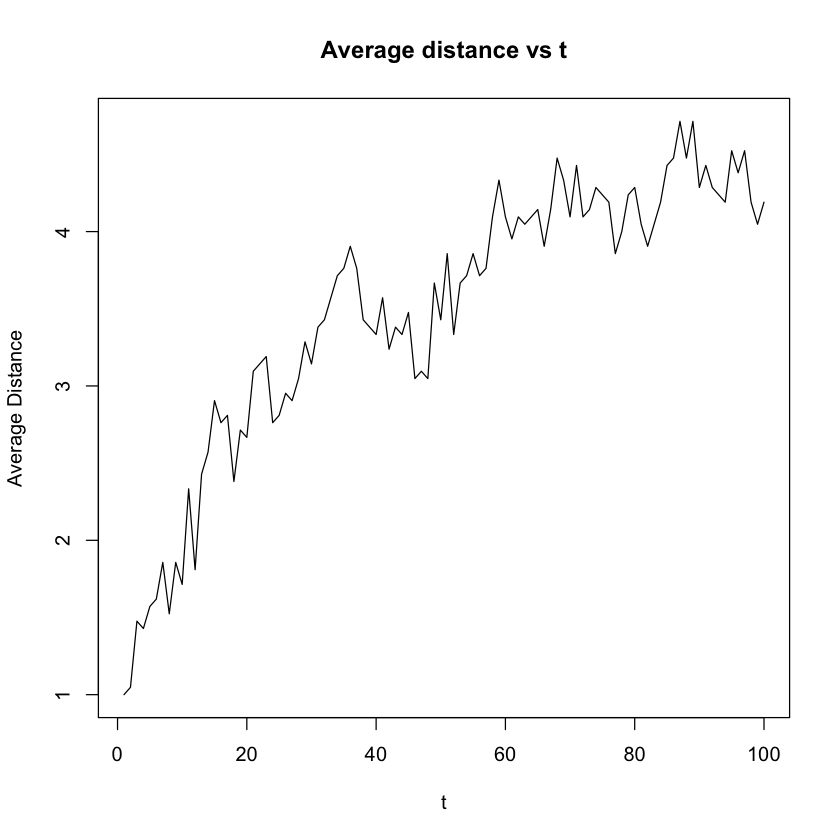

Diam: 10


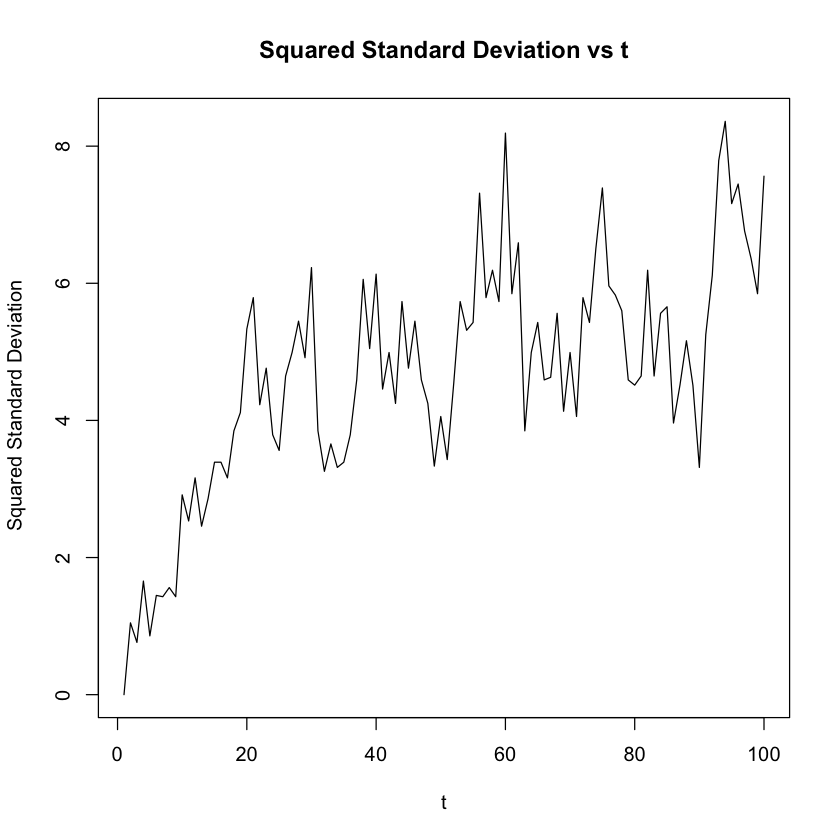

In [41]:
#100 nodes gcc
g_basic <- erdos.renyi.game(100, 0.01, directed=F)
is.connected(g_basic)
graph_connected_comp <- decompose.graph(g_basic)
gcc_index <- which.max(sapply(graph_connected_comp,vcount))
g <- graph_connected_comp[[gcc_index]]
#Part1b
is.connected(g)
degree_end_node=numeric()
vtx<-vcount(g)
x <- seq(1, vtx, 1)
tm<-create_transition_matrix(g)
average_distance_t = numeric()
standard_deviation_t = numeric() 
t<-100
mat <- matrix(, nrow = vtx, ncol = t)
row=1
for(start in x)
{
    temp<-random_walk(g,t,start,tm)
#     print(temp)
#     print(typeof(temp))
#     print(temp[1])
#     print(typeof(temp[1]))
    
    mat[row, ] <- temp[[1]]
    degree_end_node<- c(degree_end_node, temp[[2]])
    row<-row+1
#     print(mat)
}
#install.packages("matrixStats")
library(matrixStats)

average_distance_t<-colMeans(mat)
standard_deviation_t<-colSds(mat)^2

plot(average_distance_t, typ='l', main = paste("Average distance vs t"), xlab = "t", ylab = "Average Distance")
plot(standard_deviation_t, typ='l', main = paste("Squared Standard Deviation vs t"), xlab = "t", ylab = " Squared Standard Deviation")

deg = degree(g)
diam = diameter(g)
# hist(deg, breaks = seq(from = 0, to = max(deg) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution for graph",xlab = "Degree")
# hist(degree_end_node, breaks = seq(from = 0, to = max(degree_end_node) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution of the nodes reached at the
# end of the random walk",xlab = "Degree")
fprintf('Diam: %d\n', diam) 

In [43]:
#part 2a
n<-1000

g<-barabasi.game(n, m = 1, directed=FALSE)
is.connected(g)
vcount(g)
ecount(g)

[1] TRUE

[1] 1000

[1] 999

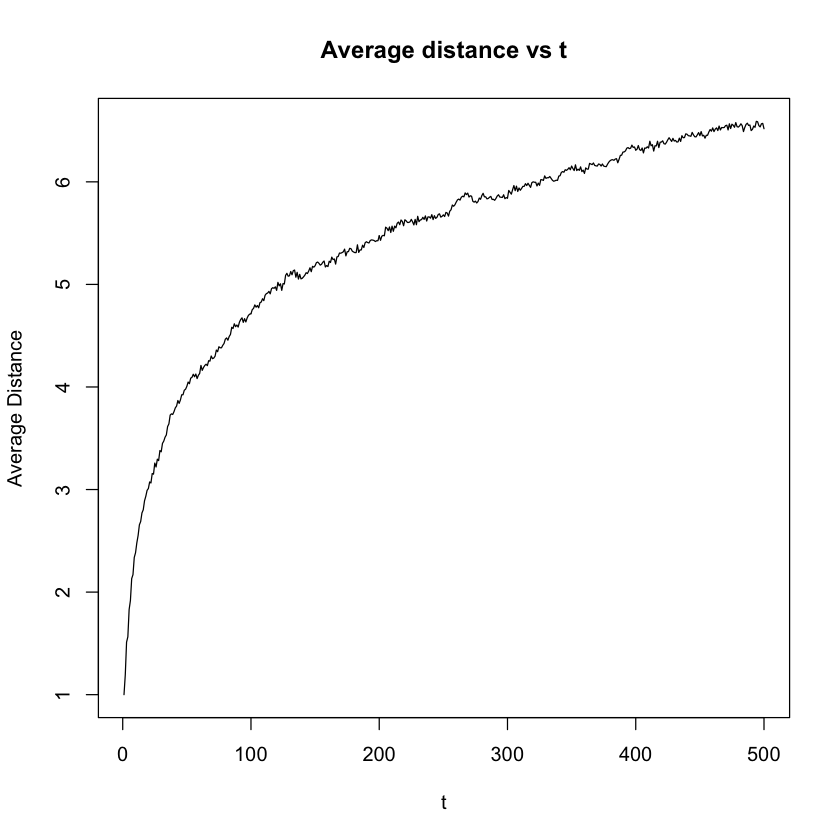

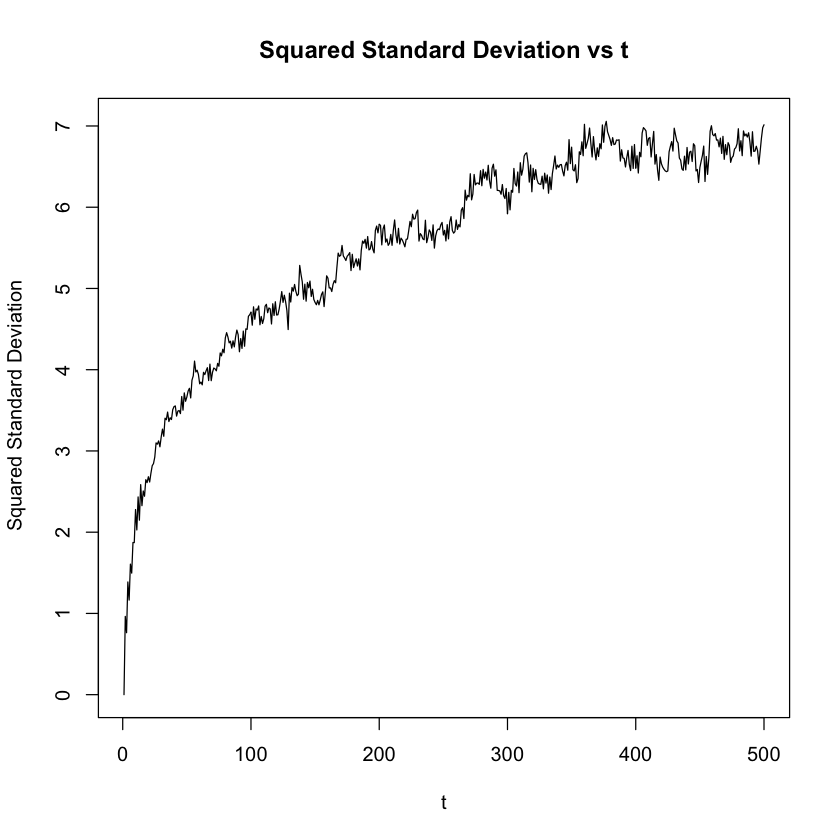

In [44]:
#part 2b
degree_end_node=numeric()

x <- sample(1:1000, 1000, replace=T)
tm<-create_transition_matrix(g)
average_distance_t = numeric()
standard_deviation_t = numeric() 
t<-500
mat <- matrix(, nrow = 1000, ncol = t)
row=1
for(start in x)
{
    temp<-random_walk(g,t,start,tm)
#     print(temp)
#     print(typeof(temp))
#     print(temp[1])
#     print(typeof(temp[1]))
    
    mat[row, ] <- temp[[1]]
    degree_end_node<- c(degree_end_node, temp[[2]])
    row<-row+1
#     print(mat)
}
#install.packages("matrixStats")
library(matrixStats)

average_distance_t<-colMeans(mat)
standard_deviation_t<-colSds(mat)^2

plot(average_distance_t, typ='l', main = paste("Average distance vs t"), xlab = "t", ylab = "Average Distance")
plot(standard_deviation_t, typ='l', main = paste("Squared Standard Deviation vs t"), xlab = "t", ylab = " Squared Standard Deviation")



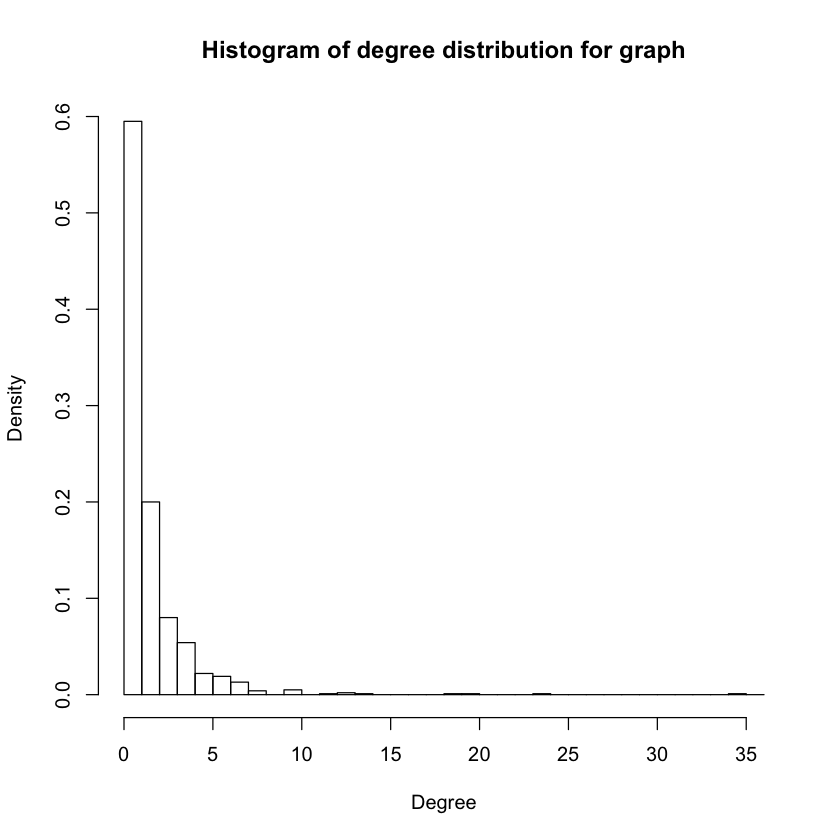

Diam: 20


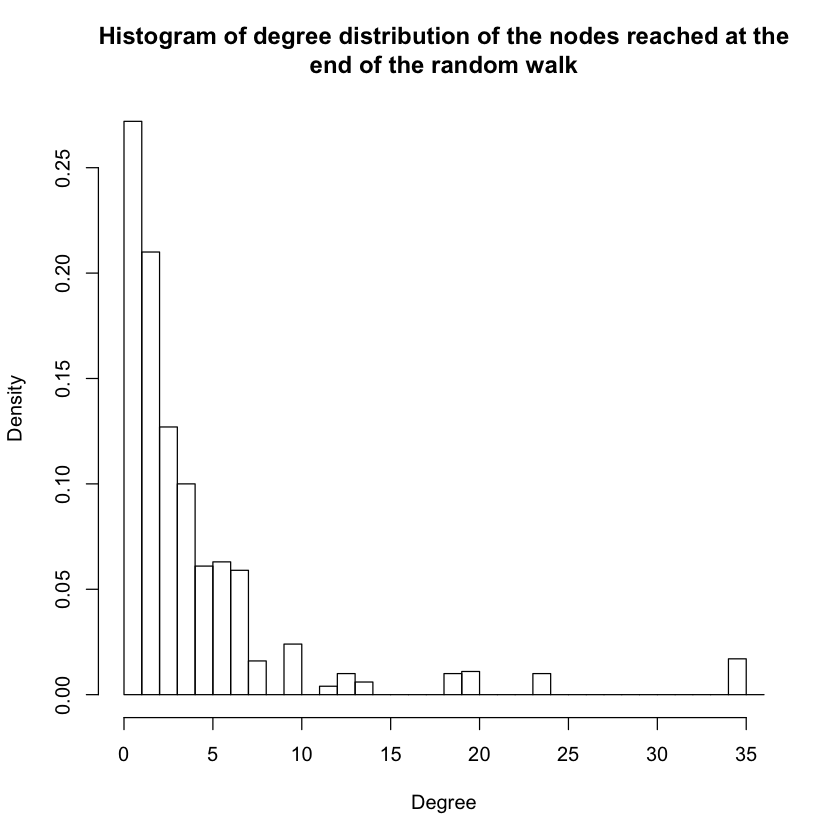

In [45]:
#part 2c

deg = degree(g)
diam = diameter(g)
hist(deg, breaks = seq(from = 0, to = max(deg) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution for graph",xlab = "Degree")
hist(degree_end_node, breaks = seq(from = 0, to = max(degree_end_node) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution of the nodes reached at the
end of the random walk",xlab = "Degree")
fprintf('Diam: %d\n', diam) 



[1] TRUE

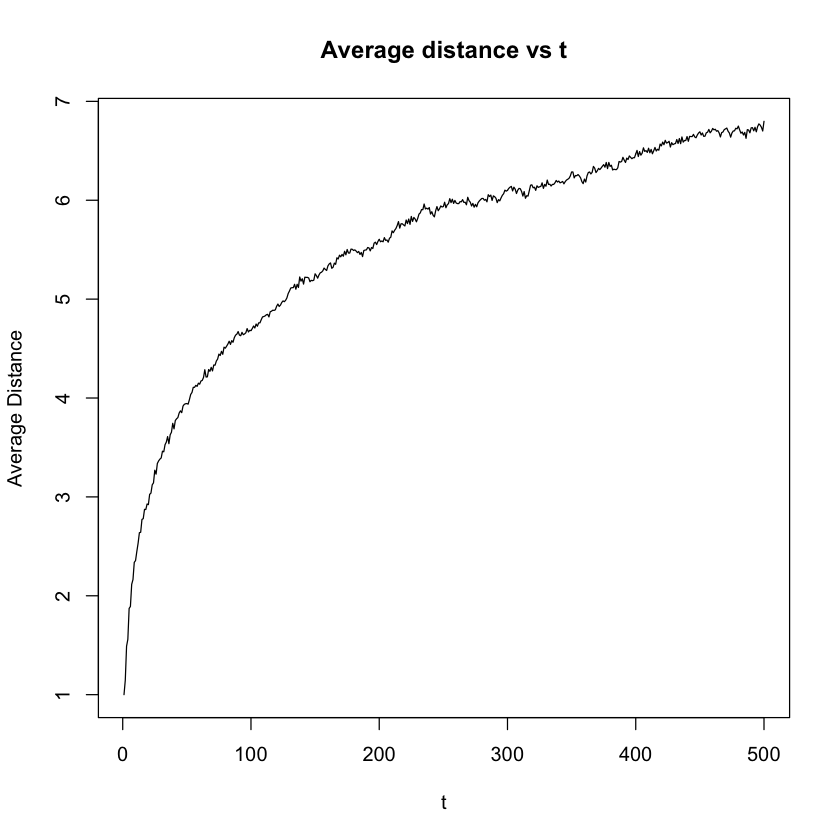

Diam: 28


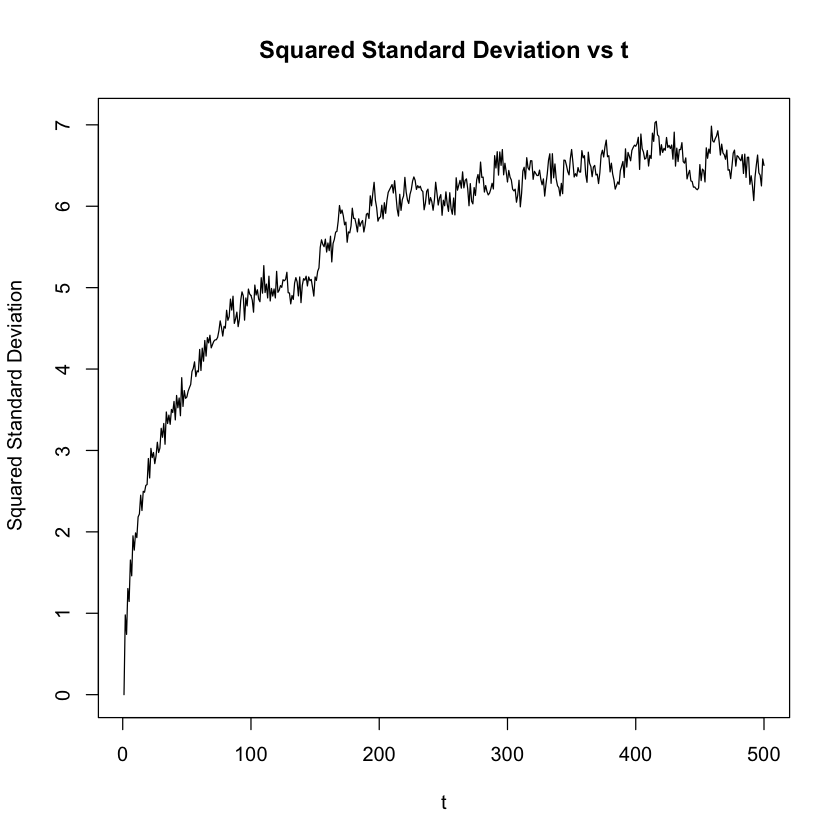

In [46]:
#Part 2d


#10000 nodes
n<-10000
g<-barabasi.game(n, m = 1, directed=FALSE)
is.connected(g)

degree_end_node=numeric()
x <- sample(1:10000, 1000, replace=T)
tm<-create_transition_matrix(g)
average_distance_t = numeric()
standard_deviation_t = numeric() 
t<-500
mat <- matrix(, nrow = 1000, ncol = t)
row=1
for(start in x)
{
    temp<-random_walk(g,t,start,tm)
#     print(temp)
#     print(typeof(temp))
#     print(temp[1])
#     print(typeof(temp[1]))
    
    mat[row, ] <- temp[[1]]
    degree_end_node<- c(degree_end_node, temp[[2]])
    row<-row+1
#     print(mat)
}
#install.packages("matrixStats")
library(matrixStats)

average_distance_t<-colMeans(mat)
standard_deviation_t<-colSds(mat)^2

plot(average_distance_t, typ='l', main = paste("Average distance vs t"), xlab = "t", ylab = "Average Distance")
plot(standard_deviation_t, typ='l', main = paste("Squared Standard Deviation vs t"), xlab = "t", ylab = " Squared Standard Deviation")

deg = degree(g)
diam = diameter(g)
# hist(deg, breaks = seq(from = 0, to = max(deg) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution for graph",xlab = "Degree")
# hist(degree_end_node, breaks = seq(from = 0, to = max(degree_end_node) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution of the nodes reached at the
# end of the random walk",xlab = "Degree")
fprintf('Diam: %d\n', diam) 







[1] TRUE

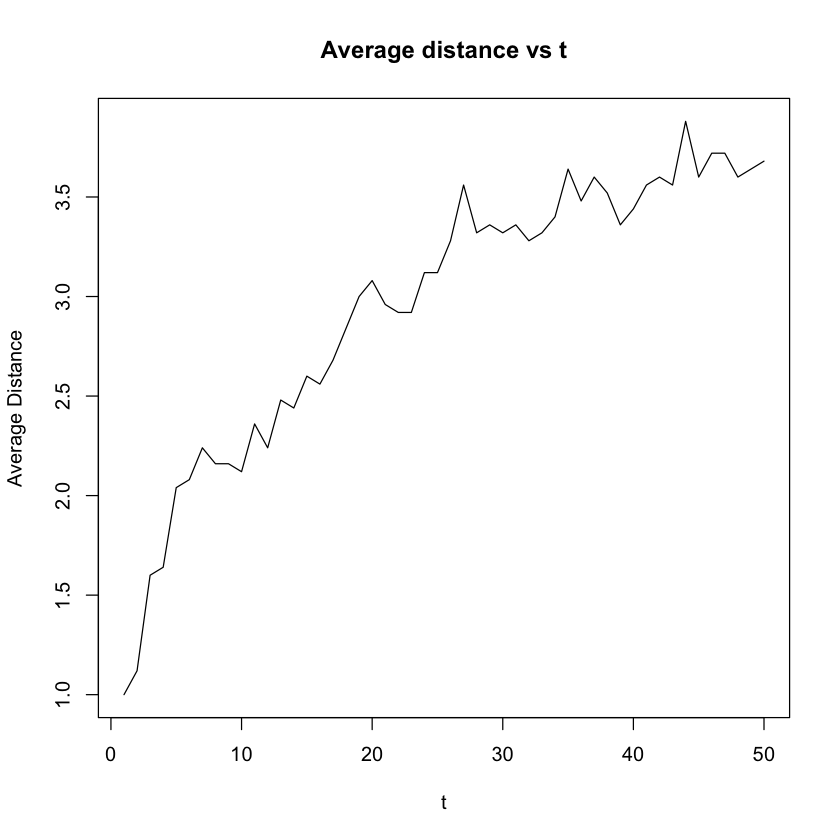

Diam: 11


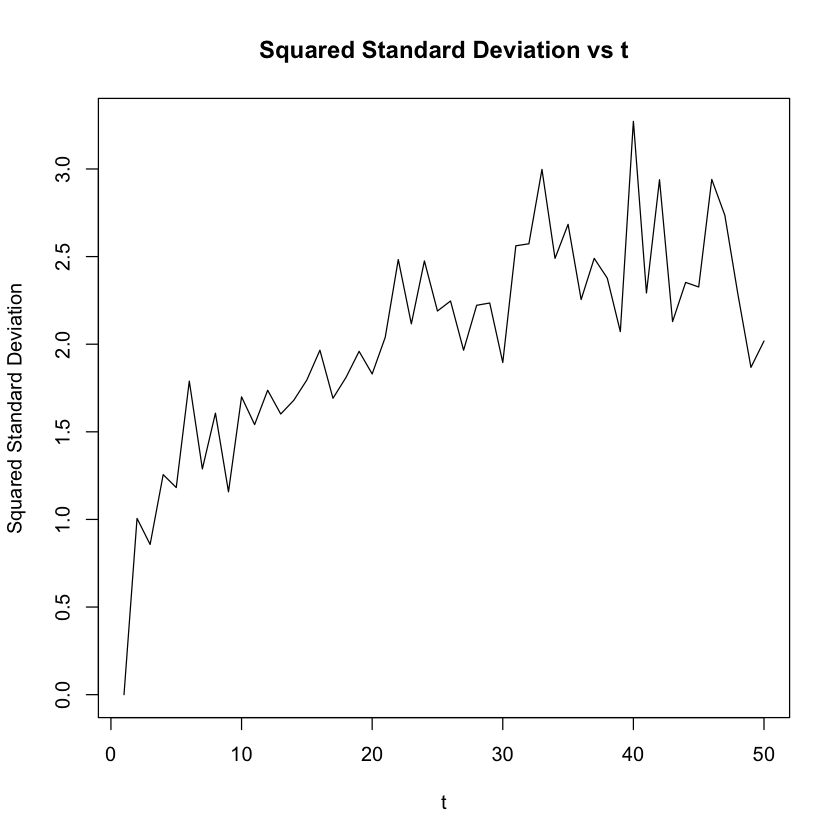

In [47]:
#Part 2d
#100 nodes

n<-100
g<-barabasi.game(n, m = 1, directed=FALSE)
is.connected(g)

degree_end_node=numeric()
x <- sample(1:100, 50, replace=T)
tm<-create_transition_matrix(g)
average_distance_t = numeric()
standard_deviation_t = numeric() 
t<-50
mat <- matrix(, nrow = 50, ncol = t)
row=1
for(start in x)
{
    temp<-random_walk(g,t,start,tm)
#     print(temp)
#     print(typeof(temp))
#     print(temp[1])
#     print(typeof(temp[1]))
    
    mat[row, ] <- temp[[1]]
    degree_end_node<- c(degree_end_node, temp[[2]])
    row<-row+1
#     print(mat)
}
#install.packages("matrixStats")
library(matrixStats)

average_distance_t<-colMeans(mat)
standard_deviation_t<-colSds(mat)^2

plot(average_distance_t, typ='l', main = paste("Average distance vs t"), xlab = "t", ylab = "Average Distance")
plot(standard_deviation_t, typ='l', main = paste("Squared Standard Deviation vs t"), xlab = "t", ylab = "Squared Standard Deviation")

deg = degree(g)
diam = diameter(g)
# hist(deg, breaks = seq(from = 0, to = max(deg) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution for graph",xlab = "Degree")
# hist(degree_end_node, breaks = seq(from = 0, to = max(degree_end_node) + 1, by = 1), freq = FALSE, main = "Histogram of degree distribution of the nodes reached at the
# end of the random walk",xlab = "Degree")
fprintf('Diam: %d\n', diam) 

